DS10 python を利用したランダムフォレストの計算例

In [ ]:
# google colab で実行する場合は以下のコメントアウトを外す
#! wget https://github.com/KHiraGit/sudspg_ds/raw/main/iris.csv

In [2]:
# ライブラリをインポート
import pandas as pd
import numpy as np
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [24]:
# irisデータ(csv形式)の読み込み
iris_df = pd.read_csv('iris.csv')
iris_data = iris_df[['sepal length (cm)', 'sepal width (cm)', 
                     'petal length (cm)', 'petal width (cm)']]
iris_target = iris_df['species']

# ランダムフォレストを作成してF値を計算 (木の数は1～10)
for i in range(1,11):
    rf = RandomForestClassifier(n_estimators=i, max_depth=3, random_state=1)
    rf = rf.fit(iris_data, iris_target)
    print(f'n_estimators={i}')
    print('f1_score:', f1_score(iris_target, rf.predict(iris_data), average="micro"))

n_estimators=1
f1_score: 0.94
n_estimators=2
f1_score: 0.9666666666666667
n_estimators=3
f1_score: 0.98
n_estimators=4
f1_score: 0.9533333333333334
n_estimators=5
f1_score: 0.9666666666666667
n_estimators=6
f1_score: 0.9666666666666667
n_estimators=7
f1_score: 0.9666666666666667
n_estimators=8
f1_score: 0.9733333333333334
n_estimators=9
f1_score: 0.9666666666666667
n_estimators=10
f1_score: 0.9666666666666667


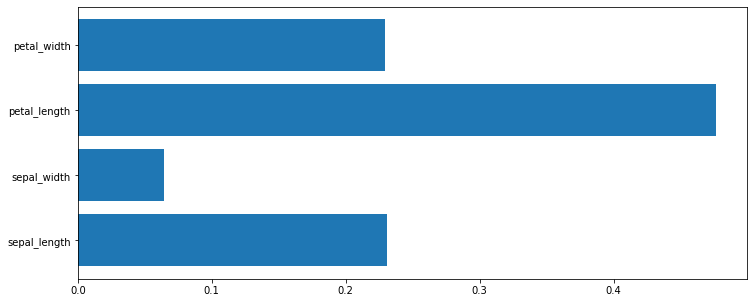

In [23]:
# 説明変数の重要度をグラフに出力
rf = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=1)
rf = rf.fit(iris_data, iris_target)
importances = rf.feature_importances_
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(12, 5))
plt.barh(range(len(feature_names)), rf.feature_importances_ , align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.show()

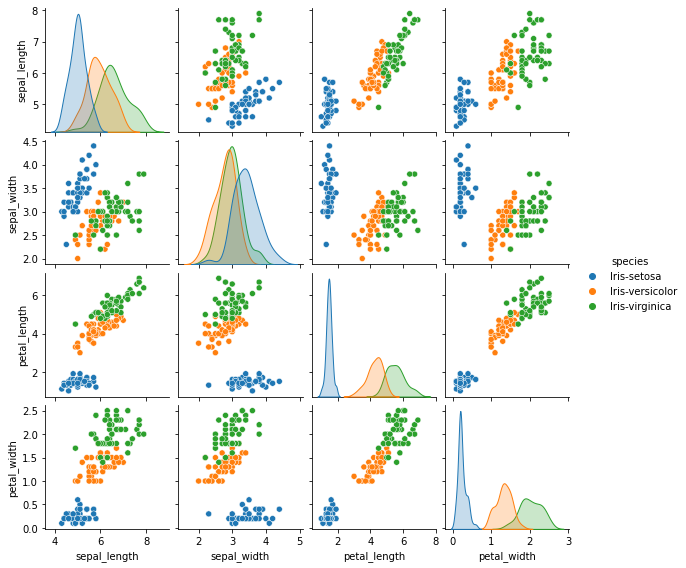

In [3]:
# ペアプロットの表示
import seaborn as sns
sns.pairplot(iris_df, hue='species', height=2)